In [88]:
 %pylab inline
import uproot, uproot3
import awkward as ak
import sys
sys.path.append("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/plots_and_tables/")
import plotter
import pandas as pd
import mplhep
plt.style.use(mplhep.style.CMS)
from yahist import Hist1D
from tqdm import notebook
import numba as nb

Populating the interactive namespace from numpy and matplotlib


In [10]:
 import glob
nanoAOD_paths = glob.glob("/hadoop/cms/store/user/bsathian/nanoAOD_runII/*/*.root")
nanoAOD_paths = [i for i in nanoAOD_paths if "20210602" not in i]

In [11]:
len(nanoAOD_paths)

12200

In [14]:
50 *  61 * 4 # accounting for 12200 files

12200

In [96]:
sel_evts = []
for file in notebook.tqdm(nanoAOD_paths):
    f = uproot3.open(file)
    tree = f["Events"]
    genArrays = tree.arrays(["GenPart_pdgId", "GenPart_mass"])
    sel_evts.append(genArrays[b"GenPart_mass"][abs(genArrays[b"GenPart_pdgId"]) == 25][:,0])
    f.close()
#events = ak.concatenate(sel_evts)

  0%|          | 0/12200 [00:00<?, ?it/s]

In [97]:
events = ak.concatenate(sel_evts)

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


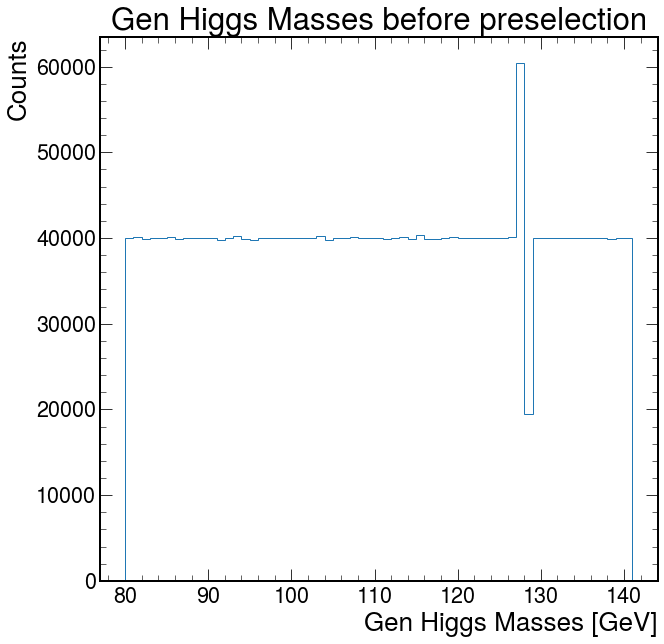

In [130]:
higgs_masses = Hist1D(events, bins = arange(80,142,1))
higgs_masses.plot()

plt.xlabel("Gen Higgs Masses [GeV]")
plt.ylabel("Counts")
plt.title("Gen Higgs Masses before preselection")
plt.savefig("gen_higgs_before_preselection.pdf")

In [ ]:
events[(events > 127) & (events < 128)])

In [120]:
127, 128

(127, 128)

In [119]:
higgs_masses.bin_centers[higgs_masses.counts > 60000]
higgs_masses.bin_centers[higgs_masses.counts < 20000]

array([128.5])

In [115]:
(60416. + 19423)/2

39919.5

In [56]:
%%time
f = uproot3.open(nanoAOD_paths[0])
tree = f["Events"]
genArrays = tree.arrays(["GenPart_pdgId", "GenPart_mass"])
genArrays[b"GenPart_mass"][abs(genArrays[b"GenPart_pdgId"]) == 25][:,0]

CPU times: user 513 ms, sys: 3 ms, total: 516 ms
Wall time: 522 ms


array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 10

In [42]:
f = uproot3.open(file)
tree = f["Events"]
genArrays = tree.arrays(["GenPart_pdgId", "GenPart_mass"])
sel_evts.append(genArrays.GenPart_mass[abs(genArrays.GenPart_pdgId) == 25][:,0])

AttributeError: 'dict' object has no attribute 'GenPart_mass'

In [48]:
x = tree.arrays(["GenPart_pdgId", "GenPart_mass"])

In [52]:
x[b"GenPart_mass"][abs(x[b"GenPart_pdgId"]) == 25][:,0]

array([106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 106., 106., 106., 106.,
       106., 106., 106., 106., 106., 106., 106., 10